The random seed number is 148


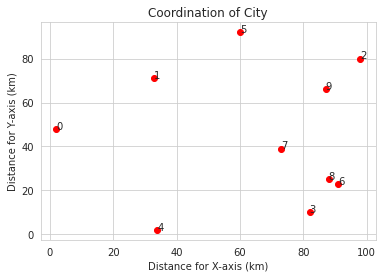

In [ ]:
import numpy as np # import numpy library for array
import matplotlib.pyplot as plt # import pyplot library for plot graph
import seaborn as sns # import seaborn library for set the white grid
import random # import random library for random seed

# Step 1: Initialize parameters
# r = random.randint(1, 1500) #random generate for 1~1500 seed number
print("The random seed number is",148) # display the seed number
np.random.seed(178) # fixed random number seed

# some parameters with assume that 10 city coordinates are randomly generated
city_num = 10  # number of cities
size = 50  # population size, that is, the number of particles (salesman)
c1 = 0.7  # Acceleration Factor for pbest-xi
c2 = 0.8  # Acceleration Factor for gbest-xi
iter_num = 20  # the maximum number of iterations of the algorithm
fitneess_value_list = []  # the optimal solution for each iteration

# Randomly generate the coordinates of city_num cities, note that the sampling is not replaced
X = np.random.choice(list(range(1, 100)), size=city_num, replace=False) # x coordinates of cities, np.array
Y = np.random.choice(list(range(1, 100)), size=city_num, replace=False) # y coordinates of cities, np.array
n = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # cities labels
sns.set_style('whitegrid') # set the white grid for better view
fig, ax = plt.subplots() # subplot for insert cities label
ax.scatter(X, Y, color='r') # set the cities colour
plt.title('Coordination of City') # title of graph
plt.xlabel('Distance for X-axis (km)') # label of x-axis
plt.ylabel('Distance for Y-axis (km)') # lable of y-axis
for i, txt in enumerate(n): # loop for 10 cities
    ax.annotate(txt, (X[i], Y[i])) # add cities labels

In [ ]:
# Step 2: distance function and fitness function

def calculate_distance(X, Y): # function to calculate the distance between cities
    distance_matrix = np.zeros((city_num, city_num)) # initialize numpy matrix to store the result for two cities
    for i in range(city_num): # first city
        for j in range(city_num): # second city
            if i == j: #if two cities at the same coordinate
                continue # distance is zero
            dis = np.sqrt((X[i] - X[j]) ** 2 + (Y[i] - Y[j]) ** 2)  # Euclidean distance between two cities calculation
            distance_matrix[i][j] = dis # assign the distance for that two cities
    return distance_matrix # return the value of distance

def fitness_func(distance_matrix, xi): # function to calculate the fitness distance of objective function value
    total_distance = 0 # initialize total distance
    for i in range(1, city_num): # loop from starting city to last city
        start = xi[i - 1] # start city coordinate
        end = xi[i] # last city coordinate
        total_distance += distance_matrix[start][end] # adding the distance between two city to total distance
    total_distance += distance_matrix[end][xi[0]]  # move from the last city to the starting city
    return total_distance # return the total distance in the solution of PSO (xi)

In [ ]:
# Step 3: Plot the graph function of the optimal solution

def plot_tsp(gbest): # function to draw a graph of the optimal solution
    n = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] # cities labels
    sns.set_style('whitegrid') # set the white grid for better view
    fig, ax = plt.subplots() # subplot for insert cities label
    ax.scatter(X, Y, color='r') # set the cities colour
    plt.title('Coordination of City') # title of graph
    plt.xlabel('Distance for X-axis (km)') # label of x-axis
    plt.ylabel('Distance for Y-axis (km)') # lable of y-axis
    for i, txt in enumerate(n): # loop for 10 cities
        ax.annotate(txt, (X[i], Y[i])) # add cities labels

    for i in range(1, city_num): # loop from starting city to last city
        start_x, start_y = X[gbest[i - 1]], Y[gbest[i - 1]] # first city coordinates
        end_x, end_y = X[gbest[i]], Y[gbest[i]] # second city coordinates
        plt.plot([start_x, end_x], [start_y, end_y], color='b', alpha=0.8) # draw a line to connect first and second city
    start_x, start_y = X[gbest[0]], Y[gbest[0]] # assign starting city coordinates
    plt.plot([start_x, end_x], [start_y, end_y], color='b', alpha=0.8) # draw a line to connect starting and last city

In [ ]:
# Step 4: Exchange sequence function and exchange operation
def get_ss(xbest, xi, r): # exchange sequence function, r = c1 or c2
    velocity_ss = [] # velocity of particle, exchange sequence ss
    for i in range(len(xi)): # looping for the range of xi, current personal best route
        if xi[i] != xbest[i]: # if the current index particle element is not equal to the optimal particle element (pbest or gbest) 
             j = np.where(xi == xbest[i])[0][0] # find the index of the element where the current particle is different from the optimal particle solution
             so = (i, j, r) # get the commutator, which means to operate on i, j with the probability of r
             velocity_ss.append(so) # append the velocity of exchange sequence
             xi[i], xi[j] = xi[j], xi[i] # perform exchange sequence operation
    return velocity_ss # return exchange subsequence

def do_ss(xi, ss): # function to update particle position
    for i, j, r in ss: # looping for swap sequence consisting of swap subs
        rand = np.random.random() # assign a random number between 0 and 1
        if rand <= r: # if random number smaller or equal to r
            xi[i], xi[j] = xi[j], xi[i] # perform exchange sequence operation
    return xi # return sequence xi, current personal best route solution

In [ ]:
# Step 5: PSO
# Step 5.1: Calculate the distance matrix between cities
distance_matrix = calculate_distance(X, Y) # compute the distance matrix between two cities

In [ ]:
# Step 5.2: Initialize the position of each particle of the population as the individual historical optimal solution pbest. 
XX = np.zeros((size, city_num), dtype=int) # Use a 50*10 matrix to represent the population, row represents a particle from 0 to 9, indicating the order of city visits
for i in range(size): # looping for the particles (salesman)
    XX[i] = np.random.choice(list(range(city_num)), size=city_num, replace=False) # random the position of each particles (salesman)

In [ ]:
# Step 5.3: Calculate the fitness of each particle
pbest = XX # initialize personal particle optimal solution route
pbest_fitness = np.zeros((size, 1)) # initialize the personal best fitness distance in numpy matrix
for i in range(size): # looping for the particles (salesman)
    pbest_fitness[i] = fitness_func(distance_matrix, xi=XX[i]) # assign the personal best fitness distance with current distance and each position

In [ ]:
# Step 5.4: Calculate the global fitness and the corresponding solution gbest
gbest = XX[pbest_fitness.argmin()] # assign personal best route to global best route
gbest_fitness = pbest_fitness.min() # assign the personal best fitness to global best fitness distance

**Han**

The 1 iteration result wih improvement: 417.35634023290106
The 3 iteration result wih improvement: 415.8242651388289
The 4 iteration result wih improvement: 394.3309952338676
The 5 iteration result wih improvement: 393.23691572767035
The 10 iteration result wih improvement: 377.99628762734955
The 12 iteration result wih improvement: 374.6237042690065
The 14 iteration result wih improvement: 309.41584304213563
The 19 iteration result wih improvement: 305.5068322926727


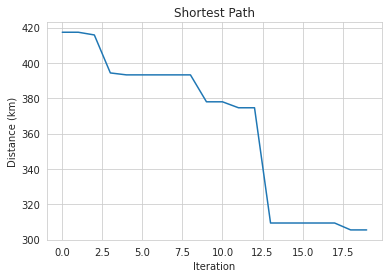

,Iteration,Shortest Distance,Updated,Improved
0,1,417.356340,417.356340,1
1,2,417.356340,0.000000,0
2,3,415.824265,415.824265,1
3,4,394.330995,394.330995,1
4,5,393.236916,393.236916,1
5,6,393.236916,0.000000,0
6,7,393.236916,0.000000,0
7,8,393.236916,0.000000,0
8,9,393.236916,0.000000,0
9,10,377.996288,377.996288,1


In [ ]:
# Step 5.5: iterative optimization and record algorithm iteration effect

import pandas as pd # import pandas library
result = np.zeros(iter_num) # result np for storing global best fitness
yes = np.zeros(iter_num, dtype=int) # yes np for storing improved count
iter = np.zeros(iter_num, dtype=int) # iter np for storing iteration count

for i in range(iter_num):  # traversing the number of iterations
  for j in range(size):  # iterate over each particle
    pbesti = pbest[j].copy() # personal best route, use copy here, otherwise there will be a shallow copy problem
    xi = XX[j].copy() # personal best route
    # Calculate the exchange sequence
    ss1 = get_ss(pbesti, xi, c1) # c1(pbest-xi)
    ss2 = get_ss(gbest, xi, c2)  # c2(gbest-xi)
    ss = ss1 + ss2 # v = c1(pbest-xi) + c2(gbest-xi)
    xi = do_ss(xi, ss) # Perform a commutation operation for particle position update, x = x + v
    fitness_new = fitness_func(distance_matrix, xi) # assign new personal best distance for each particle
    fitness_old = pbest_fitness[j] # assign old personal best distance for each particle
    if fitness_old > fitness_new: # judging whether new personal fitness is better
        pbest_fitness[j] = fitness_new # assign new personal fitness to personal best distance
        pbest[j] = xi # assign new personal best route to personal best route
  gbest_fitness_new = pbest_fitness.min() # assign the minimum personal best fitness value to global new best fitness
  iter[i] = i+1 # assign iterative count to iter np
  gbest_new = pbest[pbest_fitness.argmin()] # assign new best global route
  if gbest_fitness_new < gbest_fitness: # judging whether new global fitness is better
    yes[i] = 1 # assign improved count to yes np
    gbest_fitness = gbest_fitness_new # assign new global fitness to global best distance
    gbest = gbest_new # assign new best global route to global best route
    result[i] = gbest_fitness_new # assign new global fitness to result np
    print('The', i+1, 'iteration result wih improvement:', result[i]) # show the iteration if distance improved
  fitneess_value_list.append(gbest_fitness)  # add global best fitness to fitness value list

df = pd.DataFrame({'Iteration':iter,'Shortest Distance':fitneess_value_list,'Updated':result,'Improved':yes}) # build a table data frame
plt.plot(fitneess_value_list) # plot the Global Shortest Distance
plt.title('Shortest Path') # plot the title
plt.xlabel('Iteration') # plot the label for x-axis
plt.ylabel('Distance (km)') # plot the label for y-axis
plt.show() # show the graph
df # show the data frame table

the mean of the distance is 363.7192691532793 km
the median of the distance is 377.99628762734955 km


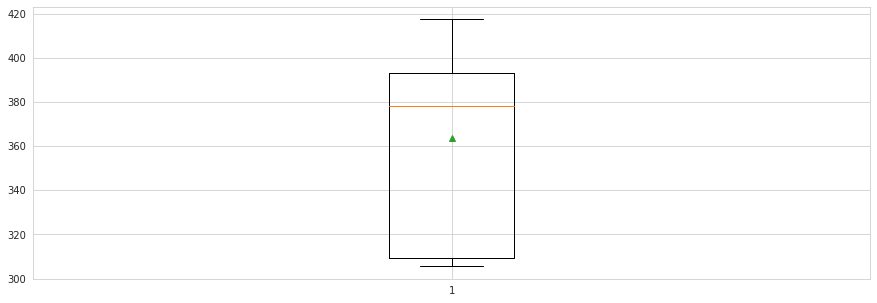

In [ ]:
import statistics
print("the mean of the distance is",statistics.mean(fitneess_value_list),"km") # print the mean of the shortest distance
print("the median of the distance is",statistics.median(fitneess_value_list),"km") # print the median of the shortest distance
fig = plt.figure(figsize =(15, 5)) # set the image size of box plot
plt.boxplot(fitneess_value_list,showmeans=True) # Creating plot
plt.show() # show plot

The optimal result of iteration： 305.5068322926727 km
Iterative optimal variables： [7 8 6 3 4 0 1 5 2 9]


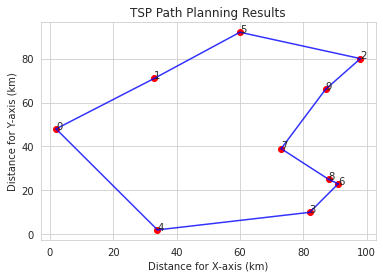

In [ ]:
# Step 5.6: Draw the result
print('The optimal result of iteration：', gbest_fitness, "km") # print the result of optimal result after iteration
print('Iterative optimal variables：', gbest) # print the result of iterative optimal variables

plot_tsp(gbest) # draw TSP path graph
plt.title('TSP Path Planning Results') # set the title of graph
plt.show() # show the graph

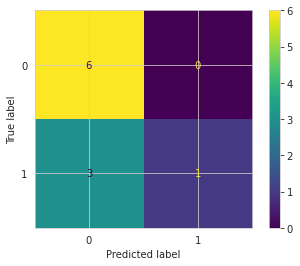

value of coefficient: [[0.01823679]]
value of intercept: [-7.42189373]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.25      0.40         4

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg       0.80      0.70      0.64        10

Confusion Matrix: 
 [[6 0]
 [3 1]]


In [ ]:
from sklearn.linear_model import LogisticRegression # import LogisticRegression library
from sklearn.model_selection import train_test_split # import train_test_split library
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score # import calculation analysis library

x = df["Shortest Distance"] # assign data frame of "Shortest Distance" as x
y = df["Improved"]          # assign data frame of "Improved" as y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, train_size=0.5, shuffle=True) # split the dataset
x_train = x_train.values.reshape(-1, 1) # reshape x_train data
y_train = y_train.values.reshape(-1, 1) # reshape y_train data
x_test = x_test.values.reshape(-1, 1)   # reshape x_test data
y_test = y_test.values.reshape(-1, 1)   # reshape y_test data

lr = LogisticRegression() # create a Logistic Regression object
lr.fit(x_train, y_train.ravel()) # perform Logistic Regression
y_pred = lr.predict(x_test) # make prediction

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_) # calculate the confusion matrix
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_) # convert confusion matrix to image
matrix.plot() # plot the confusion matrix
plt.show() # display the confusion matrix

# Evaluate the model on the test data set
print('value of coefficient:',lr.coef_) # print the coefficient
print('value of intercept:',lr.intercept_) # print the intercept
print(classification_report(y_test ,y_pred,labels=np.unique(y_pred))) # print the classification_report
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred)) # print the simple confusion matrix

**END OF CODE**